<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Medical-Insurance-/blob/main/Medical%20Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [17]:
# Uploading the dataset
dataset = pd.read_csv("/content/insurance (1).csv")

In [18]:
# Printing the head
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# Printing the tail
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [20]:
# Getting the shape of the dataset
dataset.shape

(1338, 7)

In [21]:
# Describing the dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
# Checking for missing values
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [23]:
# Getting the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
# Checking the object columns
print(dataset.sex.value_counts())
print(dataset.smoker.value_counts())
print(dataset.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [25]:
# Encoding the object columns
dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

<ipython-input-25-c42fdb844845>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
<ipython-input-25-c42fdb844845>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
<ipython-input-25-c42fdb844845>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [26]:
# Printing the head again
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


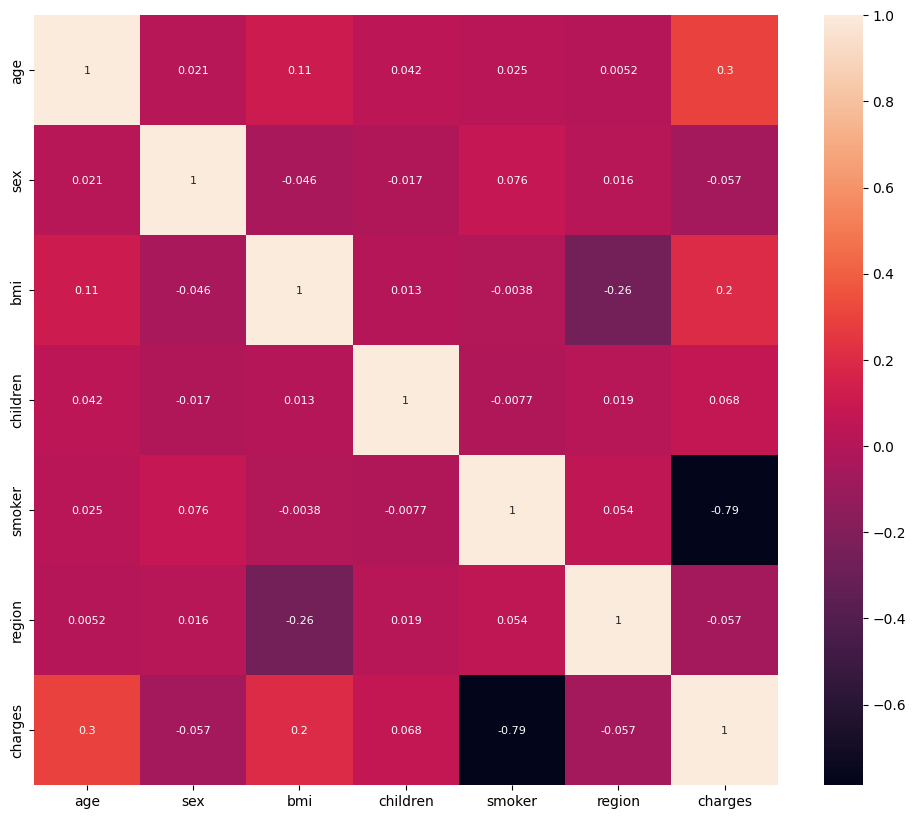

In [27]:
# Getting the correlation of the dataset
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, annot_kws={"size": 8})
plt.show()

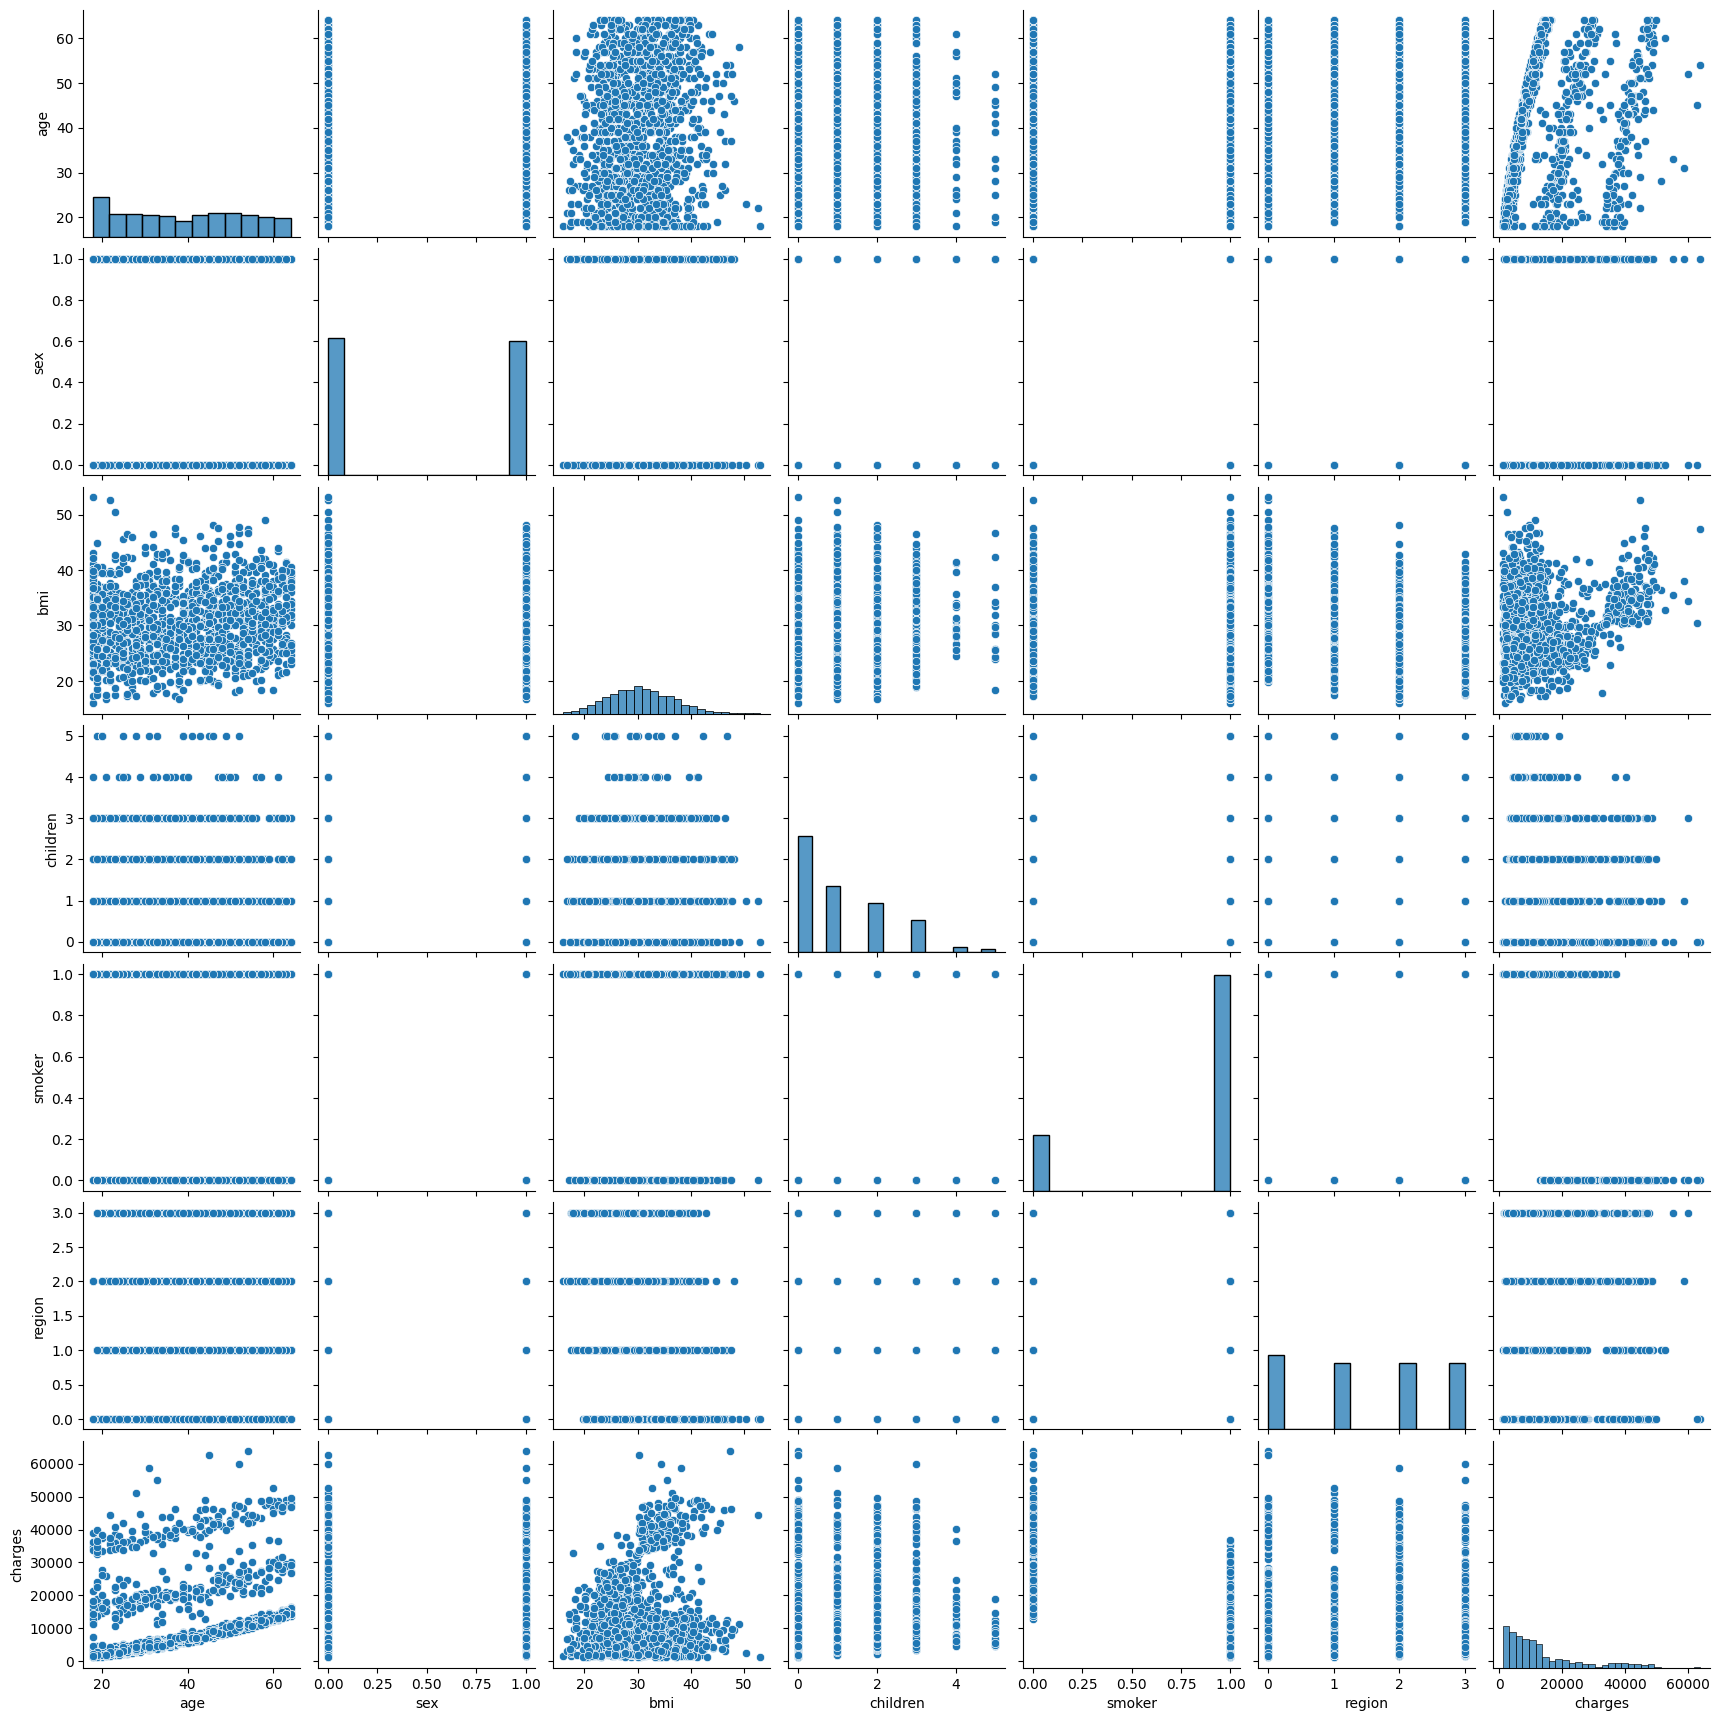

In [28]:
# Showing the correlation between the insurance and other values
sns.pairplot(dataset)

In [29]:
# Seperating the data and the charges
X = dataset.drop(columns='charges', axis=1)
Y = dataset['charges']

In [30]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
# Printing the shape of the train and test data
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [44]:
# Importing the randomforest model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [45]:
# Evaluating the model (train)
model.score(X_train, Y_train)

0.9765593396990903

In [46]:
# Evaluating the model (test)
model.score(X_test, Y_test)

0.8390879972207274

In [51]:
# Predicting on the test data
Y_pred = model.predict(X_test)

# Evaluating the model using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
r2 = metrics.r2_score(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R-squared: 0.8390879972207274
Mean Absolute Error: 2703.4225789056723
Root Mean Squared Error: 4915.881117032831


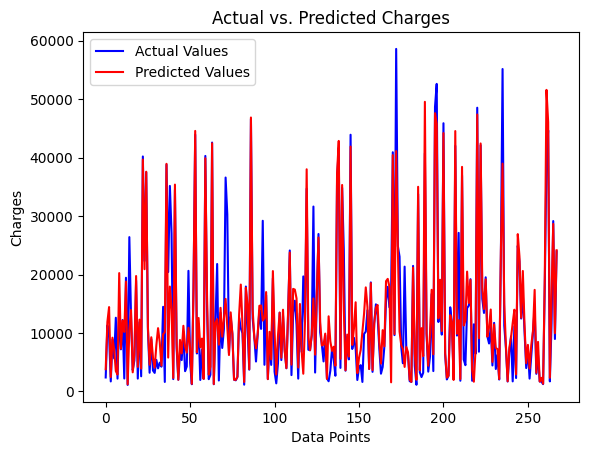

In [53]:
# Comparing the predicted values and actual values with separate plots
plt.plot(Y_test.values, label='Actual Values', color='blue')
plt.plot(Y_pred, label='Predicted Values', color='red')
plt.xlabel('Data Points')
plt.ylabel('Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.show()